In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/Courses/ML/diabetes.csv"
data = pd.read_csv(file_path)

data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [125]:
X = data.drop(columns='Outcome')
Y = data['Outcome']

In [126]:
#Split the data set into 80% Training data and 20% Test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [127]:
#Scale the data between 0 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [128]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [129]:
Y_pred = classifier.predict(X_test)

In [130]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)

In [131]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred))
print("Recall:", metrics.recall_score(Y_test, Y_pred))
print("F1 Score:", metrics.f1_score(Y_test, Y_pred))

Accuracy: 0.8246753246753247
Precision: 0.7631578947368421
Recall: 0.6170212765957447
F1 Score: 0.6823529411764706


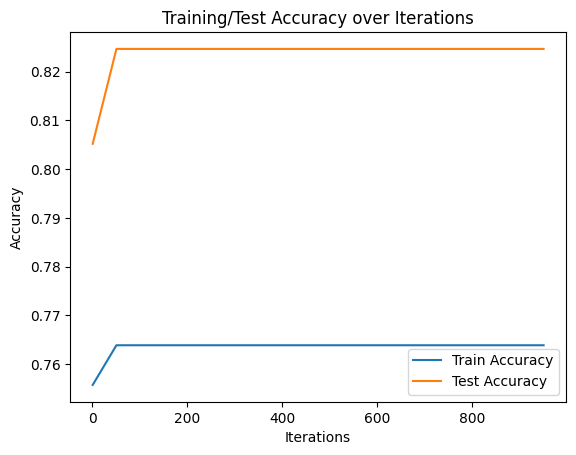

In [132]:
import warnings
warnings.filterwarnings('ignore')
train_accuracies = []
test_accuracies = []

for i in range(1, 1000, 50):
  model = LogisticRegression(max_iter = i, solver='liblinear')
  model.fit(X_train, Y_train)

  train_accuracy = model.score(X_train, Y_train)
  train_accuracies.append(train_accuracy)

  test_accuracy = model.score(X_test, Y_test)
  test_accuracies.append(test_accuracy)

iterations = np.arange(1, 1000, 50)
plt.plot(iterations, train_accuracies, label='Train Accuracy')
plt.plot(iterations, test_accuracies, label='Test Accuracy')
plt.title('Training/Test Accuracy over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Text(0.5, 533.5555555555555, 'Predicted label')

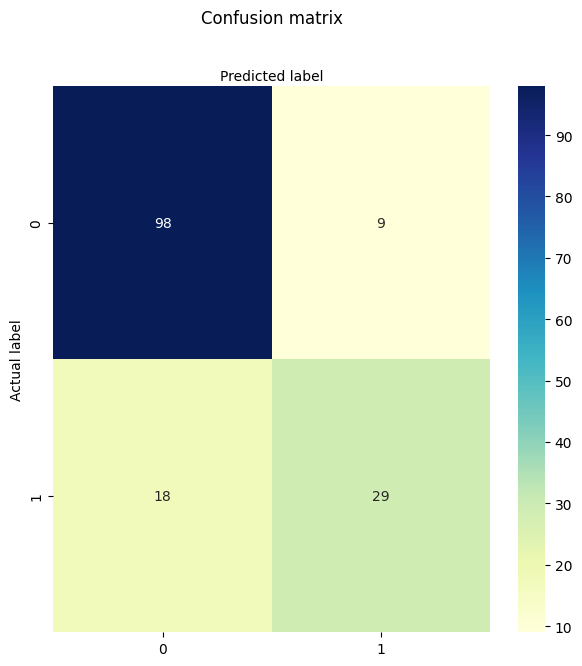

In [133]:
import seaborn as sns

plt.figure(figsize=(6,6))
ax = plt.subplot()

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')